# **A8 - KNN**
Mitch Messier, October 26, 2023

# Table of Contents

1. **Task 1:** Set up, Data import, and Preparation
2. **Task 2:** Standardize the Data
3. **Task 3:** Gridsearch for Neighbors
4. **Task 4:** Show GridSearchCV Results

# Load Libraries

In [ ]:
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix,\
recall_score, precision_score, f1_score, accuracy_score, make_scorer,\
precision_recall_fscore_support, mean_absolute_error, mean_squared_error

from sklearn.model_selection import train_test_split, cross_validate

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier

# **Task 1:** Set up, Data import, and Preparation

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/matthewpecsok/4482_fall_2022/main/data/CD_additional_modified.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4117 non-null   int64  
 1   job             4117 non-null   object 
 2   marital         4117 non-null   object 
 3   education       4117 non-null   object 
 4   default         4117 non-null   object 
 5   housing         4117 non-null   object 
 6   loan            4117 non-null   object 
 7   contact         4117 non-null   object 
 8   month           4117 non-null   object 
 9   day_of_week     4117 non-null   object 
 10  duration        4117 non-null   int64  
 11  campaign        4117 non-null   int64  
 12  pdays           4117 non-null   int64  
 13  previous        4117 non-null   int64  
 14  poutcome        4117 non-null   object 
 15  emp_var_rate    4117 non-null   float64
 16  cons_price_idx  4117 non-null   float64
 17  cons_conf_idx   4117 non-null   f

In [ ]:
data.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000
mean,40.115375,256.850376,2.537042,960.403449,0.190187,0.085742,93.580131,-40.500947,3.621904,5166.496502
std,10.314847,254.749615,2.568668,191.967524,0.541765,1.562799,0.579061,4.593445,1.733448,73.670942
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [ ]:
y_target = data.pop("y")

In [ ]:
y_target = pd.get_dummies(y_target,drop_first=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4117 non-null   int64  
 1   job             4117 non-null   object 
 2   marital         4117 non-null   object 
 3   education       4117 non-null   object 
 4   default         4117 non-null   object 
 5   housing         4117 non-null   object 
 6   loan            4117 non-null   object 
 7   contact         4117 non-null   object 
 8   month           4117 non-null   object 
 9   day_of_week     4117 non-null   object 
 10  duration        4117 non-null   int64  
 11  campaign        4117 non-null   int64  
 12  pdays           4117 non-null   int64  
 13  previous        4117 non-null   int64  
 14  poutcome        4117 non-null   object 
 15  emp_var_rate    4117 non-null   float64
 16  cons_price_idx  4117 non-null   float64
 17  cons_conf_idx   4117 non-null   f

In [ ]:
data.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000
mean,40.115375,256.850376,2.537042,960.403449,0.190187,0.085742,93.580131,-40.500947,3.621904,5166.496502
std,10.314847,254.749615,2.568668,191.967524,0.541765,1.562799,0.579061,4.593445,1.733448,73.670942
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8


In [ ]:
encoded_data = pd.get_dummies(data)
encoded_data

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,0,0,1,0,0,0,0,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,0,0,1,0,0,0,0,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,0,0,1,0,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,1,0,0,0,0,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4112,30,53,1,999,0,1.4,93.918,-42.7,4.958,5228.1,...,0,0,0,0,1,0,0,0,1,0
4113,39,219,1,999,0,1.4,93.918,-42.7,4.959,5228.1,...,0,0,1,0,0,0,0,0,1,0
4114,27,64,2,999,1,-1.8,92.893,-46.2,1.354,5099.1,...,0,0,0,1,0,0,0,1,0,0
4115,58,528,1,999,0,1.4,93.444,-36.1,4.966,5228.1,...,0,0,1,0,0,0,0,0,1,0


# **Task 2:** Standardize the Data

In [ ]:
column_names = encoded_data.columns

scaled_data = StandardScaler().fit_transform(encoded_data)
scaled_data = pd.DataFrame(scaled_data, columns = column_names)
scaled_data.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,-0.980781,0.903544,-0.209099,0.201082,-0.351094,-1.206791,-1.186776,-1.240843,-1.332133,-0.914943,...,-0.130558,-0.125661,2.088223,-0.511966,-0.513855,-0.506292,-0.488816,-0.351618,0.411021,-0.189006
1,-0.108146,0.349992,0.569609,0.201082,-0.351094,0.649080,0.714811,0.892891,0.711441,0.332648,...,-0.130558,-0.125661,2.088223,-0.511966,-0.513855,-0.506292,-0.488816,-0.351618,0.411021,-0.189006
2,-1.465578,-0.117190,-0.598453,0.201082,-0.351094,0.841066,1.528296,-0.282840,0.773175,0.836300,...,-0.130558,-0.125661,-0.478876,-0.511966,-0.513855,-0.506292,2.045761,-0.351618,0.411021,-0.189006
3,-0.205106,-0.941629,0.180255,0.201082,-0.351094,0.841066,1.528296,-0.282840,0.771444,0.836300,...,-0.130558,-0.125661,2.088223,-0.511966,-0.513855,-0.506292,-0.488816,-0.351618,0.411021,-0.189006
4,0.667529,-0.780667,-0.598453,0.201082,-0.351094,-0.118867,-0.656542,-0.326386,0.328343,0.397810,...,-0.130558,-0.125661,-0.478876,1.953255,-0.513855,-0.506292,-0.488816,-0.351618,0.411021,-0.189006


# **Task 3:** Gridsearch for Neighbors

In [ ]:
parameters = {'n_neighbors': range(1,11)}

In [ ]:
KNN = GridSearchCV(KNeighborsClassifier(), parameters, scoring = 'f1', cv=3, return_train_score=True).fit(scaled_data, y_target)
result_df = pd.DataFrame(KNN.cv_results_)

# **Task 4:** Show GridSearchCV Results

[]

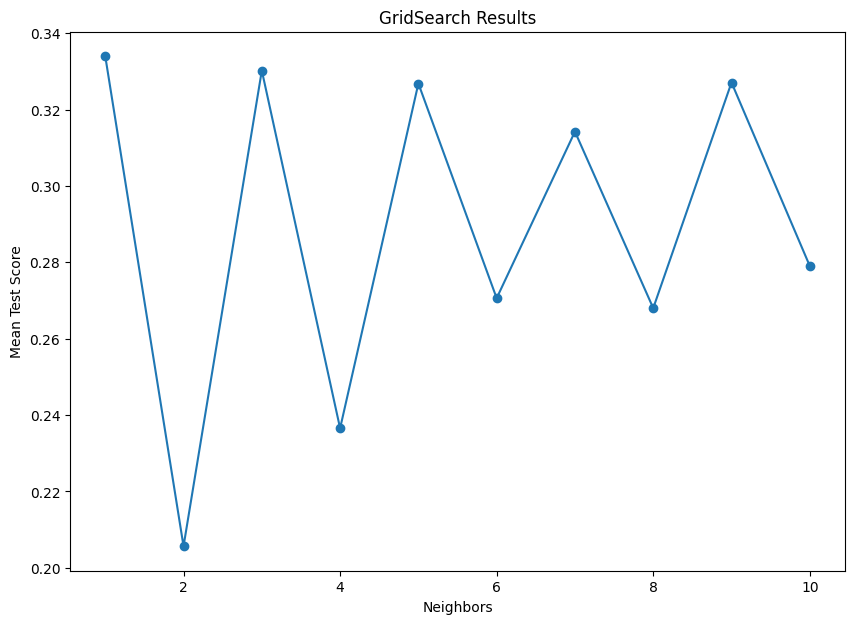

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(result_df['param_n_neighbors'],result_df['mean_test_score'], marker='o', linestyle='-')
plt.title('GridSearch Results')
plt.xlabel('Neighbors')
plt.ylabel('Mean Test Score')
plt.plot()

In [ ]:
result_df = result_df.sort_values(by='mean_test_score', ascending = False)
result_df.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.007240,0.003769,0.139101,0.030351,1,{'n_neighbors': 1},0.288973,0.329670,0.383275,0.333973,0.038619,1,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.005506,0.000148,0.107713,0.005149,3,{'n_neighbors': 3},0.301370,0.333333,0.355932,0.330212,0.022384,2,0.601227,0.634855,0.579399,0.605160,0.022810
8,0.005222,0.000154,0.117703,0.016010,9,{'n_neighbors': 9},0.321951,0.306931,0.352381,0.327088,0.018907,3,0.406780,0.408759,0.384236,0.399925,0.011123
4,0.006345,0.000905,0.159178,0.062179,5,{'n_neighbors': 5},0.312195,0.341014,0.327273,0.326827,0.011769,4,0.503401,0.455581,0.426540,0.461841,0.031689
6,0.004478,0.000047,0.104165,0.010621,7,{'n_neighbors': 7},0.306931,0.302439,0.333333,0.314234,0.013629,5,0.425121,0.448113,0.411765,0.428333,0.015012


**Reflection on Nearest Neighbor Analysis:** After performing a gridsearch on the data, we've found that 1, 3, 9, 5, and 7 neighbors respectivly have produced the highest f1 scores, in that order. It's interesting to note that an odd number of neighbors produced the best results, vice versa for even number of neighbors. However, the best mdoel in the dataset generated an f1 score of 0.31 and had only 1 neighbor.

# Convert to HTML

In [ ]:
# Insert a code cell to include to following line of command in each
# Colab notebook to access data files saved in Google Drive of your account
# Retrieve csv file from google drive by mapping the folder from google drive.
# Must be done each time session expires.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Copy the ipynb to the local working directory
# Replace 'A7_Messier_Mitch.ipynb' with your actual file name if it's different
!cp "/content/drive/MyDrive/A8_Messier_Mitch.ipynb" ./

# Create an HTML file from the ipynb
!jupyter nbconvert --to html "A8_Messier_Mitch.ipynb"

[NbConvertApp] Converting notebook A8_Messier_Mitch.ipynb to html
[NbConvertApp] Writing 741450 bytes to A8_Messier_Mitch.html
